### <font color="green" style="calibre">Table of Contents</font>

[<font color="green" size=4.5>1. Importing Necessary Packages and Libraries</font>](#Importing-Necessary-Packages-and-lLbraries)


### <font color="green">1. Importing Necessary Packages and Libraries</font>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
import bz2
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.losses import binary_crossentropy
from keras.callbacks import History
warnings.filterwarnings('ignore')

%matplotlib inline

### <font color="green">2. Loading Data</font>

<p>Since the data is compressed, I have to decompressed it duirng loading</p>

In [45]:
def load_data(file):
    data = bz2.BZ2File(file, "r")
    data = pickle.load(data)
    return data

In [46]:
PATH_TRAIN = '../data/raw/act_train.pbz2'
PATH_TEST = '../data/raw/act_test.pbz2'
PATH_PEOPLE = '../data/raw/people.pbz2'
train = load_data(PATH_TRAIN)
test = load_data(PATH_TEST)
people = load_data(PATH_PEOPLE)

### <font color="green">3. Exploring Data<font>

In [47]:
train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [48]:
train.tail()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 199,1
2197290,ppl_99994,act2_715089,2023-06-15,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [49]:
train.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [50]:
row, col = train.shape
print('The length of the train row:', row)
print('The length of the train column:', col)

The length of the train row: 2197291
The length of the train column: 15


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date               object
 3   activity_category  object
 4   char_1             object
 5   char_2             object
 6   char_3             object
 7   char_4             object
 8   char_5             object
 9   char_6             object
 10  char_7             object
 11  char_8             object
 12  char_9             object
 13  char_10            object
 14  outcome            int64 
dtypes: int64(1), object(14)
memory usage: 251.5+ MB


In [52]:
train.isna().sum() / train.shape[0] # ratio/percentage of the null values for each attribute

people_id            0.000000
activity_id          0.000000
date                 0.000000
activity_category    0.000000
char_1               0.928268
char_2               0.928268
char_3               0.928268
char_4               0.928268
char_5               0.928268
char_6               0.928268
char_7               0.928268
char_8               0.928268
char_9               0.928268
char_10              0.071732
outcome              0.000000
dtype: float64

<p>We can see clearly below the bottom of the series above that the columns with names "char_#" has
about 93% of its values being null.<br> Let's remove them then.</p>

In [54]:
col = ['people_id', 'activity_id', 'date', 'activity_category', 'char_10', 'outcome']
df = train[col]
df.head()
# dropna(axis=1, ignore_index=True)

,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0


In [55]:
# renaming columns to prevent clashes
df = df.rename(columns={'date': 'activity_date', 'char_10': 'activity_type'})

In [57]:
# Replace nulls in the activity_type column with the mode
df['activity_type'] = df['activity_type'].fillna(df['activity_type'].mode()[0])

In [61]:
print(df['outcome'].value_counts())
print("Shape of Activity data:", df.shape)

outcome
0    1221794
1     975497
Name: count, dtype: int64
Shape of Activity data: (2197291, 6)


In [63]:
df.describe(include='all')

,people_id,activity_id,activity_date,activity_category,activity_type,outcome
count,2197291,2197291,2197291,2197291,2197291,2.197291e+06
unique,151295,2197291,411,7,6515,NaN
top,ppl_294918,act2_1734928,2022-09-30,type 2,type 1,NaN
freq,55103,1,48174,904683,1062298,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.439544e-01
std,NaN,NaN,NaN,NaN,NaN,4.968491e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


<p>Let's <strong>explore</strong> the people dataframe and see what we've got there too.</p>

In [64]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [65]:
people.tail()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
189113,ppl_99987,type 1,group 8600,type 1,2022-04-02,type 4,type 6,type 4,type 3,type 11,...,False,False,False,True,False,True,False,True,True,89
189114,ppl_9999,type 2,group 17304,type 2,2023-02-23,type 6,type 2,type 8,type 3,type 11,...,False,False,False,False,False,False,False,False,False,0
189115,ppl_99992,type 2,group 17304,type 2,2020-06-25,type 5,type 5,type 3,type 4,type 16,...,False,False,False,False,False,False,False,False,False,0
189116,ppl_99994,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,...,True,True,True,True,False,True,True,True,True,95
189117,ppl_99997,type 2,group 17304,type 2,2022-03-12,type 40,type 25,type 9,type 3,type 8,...,False,False,False,False,False,False,False,False,False,36


In [66]:
row, col = people.shape
print('The number of rows in train:', row)
print('The number of columns in train:', col)

The number of rows in train: 189118
The number of columns in train: 41


In [68]:
people.loc[:, people.dtypes=='object'] = people.select_dtypes('object').apply(lambda x: x.astype('category'))
people.loc[:, people.dtypes=='bool'] = people.select_dtypes('bool').apply(lambda x: x.astype('category'))

In [69]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   people_id  189118 non-null  object  
 1   char_1     189118 non-null  object  
 2   group_1    189118 non-null  object  
 3   char_2     189118 non-null  object  
 4   date       189118 non-null  object  
 5   char_3     189118 non-null  object  
 6   char_4     189118 non-null  object  
 7   char_5     189118 non-null  object  
 8   char_6     189118 non-null  object  
 9   char_7     189118 non-null  object  
 10  char_8     189118 non-null  object  
 11  char_9     189118 non-null  object  
 12  char_10    189118 non-null  category
 13  char_11    189118 non-null  category
 14  char_12    189118 non-null  category
 15  char_13    189118 non-null  category
 16  char_14    189118 non-null  category
 17  char_15    189118 non-null  category
 18  char_16    189118 non-null  category
 19  ch

<p>Let's merge the people data with the train data based the <strong>peeple_id</strong> as key</p?

In [70]:
merged_df = df.merge(people, on=["people_id"], how="inner")
print("Shape before merging:",df.shape)
print("Shape after merging :",merged_df.shape)

Shape before merging: (2197291, 6)
Shape after merging : (2197291, 46)


In [71]:
merged_df.head()

,people_id,activity_id,activity_date,activity_category,activity_type,outcome,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36


In [72]:
merged_df.tail()

,people_id,activity_id,activity_date,activity_category,activity_type,outcome,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,type 418,1,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,type 1832,1,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197288,ppl_99994,act2_536973,2023-01-19,type 2,type 1,1,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197289,ppl_99994,act2_688656,2023-05-02,type 4,type 199,1,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197290,ppl_99994,act2_715089,2023-06-15,type 2,type 1,1,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95


In [73]:
# Let's view the unique percentage of the merged dataframe
merged_df_NA_percentage = pd.DataFrame(merged_df.isna().sum() / merged_df.shape[0], columns=["NA_Percentage"])
merged_df_NA_percentage['NA_Percentage'].unique()

array([0.])

In [76]:
# checking for duplicated entries/record/instances
merged_df.duplicated().any()


False

In [78]:
print("Unique values for outcome:", merged_df["outcome"].unique())
print()
print("Percentage of distribution for outcome-")
print(merged_df["outcome"].value_counts() / merged_df.shape[0])

Unique values for outcome: [0 1]

Percentage of distribution for outcome-
outcome
0    0.556046
1    0.443954
Name: count, dtype: float64


### <font color="green">Feature Engineering<font>

<p>I will begin by extracting the <strong>year</strong>, <strong>month</strong>, and <strong>day</strong> as a separate fetures from the date features<p>

In [81]:
merged_df[["activity_date", "date"]].head()

,activity_date,date
0,2023-08-26,2021-06-29
1,2022-09-27,2021-06-29
2,2022-09-27,2021-06-29
3,2023-08-04,2021-06-29
4,2023-08-26,2021-06-29


In [83]:
merged_df = merged_df.rename(columns={'date': 'customer_date'})

In [84]:
def extract_year_month_day(df, column_name):
    df[column_name + '_year'] = df[column_name].dt.year
    df[column_name + '_month'] = df[column_name].dt.month
    df[column_name + '_day'] = df[column_name].dt.day
    return df


date_columns = ["activity_date", "customer_date"]
for col in date_columns:
    merged_df[col] = pd.to_datetime(merged_df[col])
    
for col in date_columns:
    extract_year_month_day(merged_df, col)

#removing the date features from the dataframe
merged_df = merged_df.drop(date_columns, axis=1)
    
merged_df.head()

,people_id,activity_id,activity_category,activity_type,outcome,char_1,group_1,char_2,char_3,char_4,...,char_35,char_36,char_37,char_38,activity_date_year,activity_date_month,activity_date_day,customer_date_year,customer_date_month,customer_date_day
0,ppl_100,act2_1734928,type 4,type 76,0,type 2,group 17304,type 2,type 5,type 5,...,True,True,False,36,2023,8,26,2021,6,29
1,ppl_100,act2_2434093,type 2,type 1,0,type 2,group 17304,type 2,type 5,type 5,...,True,True,False,36,2022,9,27,2021,6,29
2,ppl_100,act2_3404049,type 2,type 1,0,type 2,group 17304,type 2,type 5,type 5,...,True,True,False,36,2022,9,27,2021,6,29
3,ppl_100,act2_3651215,type 2,type 1,0,type 2,group 17304,type 2,type 5,type 5,...,True,True,False,36,2023,8,4,2021,6,29
4,ppl_100,act2_4109017,type 2,type 1,0,type 2,group 17304,type 2,type 5,type 5,...,True,True,False,36,2023,8,26,2021,6,29


In [85]:
# For people ID, we would need to extract values after '_'
merged_df['people_id'] = merged_df['people_id'].apply(lambda x: x.split("_")[1])
merged_df['people_id'] = pd.to_numeric(merged_df['people_id'])

# For activity ID also, we would need to extract values after '_'
merged_df['activity_id'] = merged_df['activity_id'].apply(lambda x: x.split("_")[1])
merged_df['activity_id'] = pd.to_numeric(merged_df['activity_id'])

# For group_1 , we would need to extract values after ' '
merged_df['group_1'] = merged_df['group_1'].apply(lambda x: x.split(" ")[1])
merged_df['group_1'] = pd.to_numeric(merged_df['group_1'])

# For activity_type , we would need to extract values after ' '
merged_df['activity_type'] = merged_df['activity_type'].apply(lambda x: x.split(" ")[1])
merged_df['activity_type'] = pd.to_numeric(merged_df['activity_type'])

# Double check the new values in the dataframe
merged_df[["people_id","activity_type","activity_id", "group_1"]].head()

,people_id,activity_type,activity_id,group_1
0,100.0,76,1734928.0,17304
1,100.0,1,2434093.0,17304
2,100.0,1,3404049.0,17304
3,100.0,1,3651215.0,17304
4,100.0,1,4109017.0,17304


In [86]:
# I had to save the datframe after featue engineering. note that I ahd to compressed the size of the data to save storage

COMPRESSED_FILE_PATH = "../data/merged/merged_df.pbz2"

if not os.path.exists(COMPRESSED_FILE_PATH):
    f = bz2.BZ2File(COMPRESSED_FILE_PATH, "w")
    pickle.dump(merged_df, f)

### <font color="green">Label Encoding</font>

In [88]:
merged_df.dtypes # Let's view the dtype of the merged dataframe

people_id               float64
activity_id             float64
activity_category        object
activity_type             int64
outcome                   int64
char_1                   object
group_1                   int64
char_2                   object
char_3                   object
char_4                   object
char_5                   object
char_6                   object
char_7                   object
char_8                   object
char_9                   object
char_10                category
char_11                category
char_12                category
char_13                category
char_14                category
char_15                category
char_16                category
char_17                category
char_18                category
char_19                category
char_20                category
char_21                category
char_22                category
char_23                category
char_24                category
char_25                category
char_26 

In [90]:
# I have to filter off the features with object data type ao as to encode them

columns_to_encode = merged_df.select_dtypes(exclude=[bool, int, float]).columns
merged_df[columns_to_encode].head()

,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37
0,type 4,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,...,True,False,True,True,False,False,True,True,True,False
1,type 2,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,...,True,False,True,True,False,False,True,True,True,False
2,type 2,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,...,True,False,True,True,False,False,True,True,True,False
3,type 2,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,...,True,False,True,True,False,False,True,True,True,False
4,type 2,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,...,True,False,True,True,False,False,True,True,True,False


In [91]:
# creating a tranformer object to label encode the object-typed features

transformer = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(), columns_to_encode)], remainder='passthrough')
merged_df_2 = transformer.fit_transform(merged_df)

In [92]:
merged_df_2 = pd.DataFrame(merged_df_2, columns=merged_df.columns)
merged_df_2.sample(4, random_state=2023)

,people_id,activity_id,activity_category,activity_type,outcome,char_1,group_1,char_2,char_3,char_4,...,char_35,char_36,char_37,char_38,activity_date_year,activity_date_month,activity_date_day,customer_date_year,customer_date_month,customer_date_day
1502722,1.0,1.0,2.0,11.0,6.0,1.0,2.0,24.0,1.0,1.0,...,1.0,1.0,321.0,97.0,2022.0,8.0,26.0,2022.0,2.0,5.0
687057,1.0,0.0,0.0,19.0,6.0,6.0,2.0,23.0,0.0,0.0,...,1.0,1.0,2233.0,78.0,2022.0,8.0,30.0,2020.0,7.0,10.0
1878491,2.0,1.0,2.0,38.0,20.0,4.0,3.0,8.0,1.0,1.0,...,2.0,0.0,34681.0,91.0,2023.0,4.0,1.0,2023.0,4.0,1.0
2121713,1.0,1.0,1.0,34.0,17.0,8.0,2.0,23.0,2.0,2.0,...,1.0,0.0,17304.0,0.0,2022.0,8.0,20.0,2021.0,10.0,19.0


In [93]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 50 columns):
 #   Column               Dtype  
---  ------               -----  
 0   people_id            float64
 1   activity_id          float64
 2   activity_category    float64
 3   activity_type        float64
 4   outcome              float64
 5   char_1               float64
 6   group_1              float64
 7   char_2               float64
 8   char_3               float64
 9   char_4               float64
 10  char_5               float64
 11  char_6               float64
 12  char_7               float64
 13  char_8               float64
 14  char_9               float64
 15  char_10              float64
 16  char_11              float64
 17  char_12              float64
 18  char_13              float64
 19  char_14              float64
 20  char_15              float64
 21  char_16              float64
 22  char_17              float64
 23  char_18              float64
 24

We can see from the above output that the size of the final dateset is 838.2 MB. Let's try then to reduce it by converting the float64 dtypes to float32

In [97]:
def convert_columns_to_float32(df):
    """
    Convert all columns of a DataFrame to float32 data type.
    
    Args:
        df (pd.DataFrame): The DataFrame to be converted.

    Returns:
        pd.DataFrame: The DataFrame with columns converted to float32.
    """
    try:
        return df.astype('float32')
    except ValueError as e:
        print(f"Error converting columns to float32: {e}")
        return df


merged_df_3 = convert_columns_to_float32(merged_df_2)


In [98]:
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 50 columns):
 #   Column               Dtype  
---  ------               -----  
 0   people_id            float32
 1   activity_id          float32
 2   activity_category    float32
 3   activity_type        float32
 4   outcome              float32
 5   char_1               float32
 6   group_1              float32
 7   char_2               float32
 8   char_3               float32
 9   char_4               float32
 10  char_5               float32
 11  char_6               float32
 12  char_7               float32
 13  char_8               float32
 14  char_9               float32
 15  char_10              float32
 16  char_11              float32
 17  char_12              float32
 18  char_13              float32
 19  char_14              float32
 20  char_15              float32
 21  char_16              float32
 22  char_17              float32
 23  char_18              float32
 24

<p>Woow, there is it, the total size of the dataframe after merging and datatype conversion is now 419.1 MB.</p>

### <font color="green">DNN</font>

In [99]:
X = merged_df_3.drop('outcome', axis=1)
y = merged_df_3['outcome']

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (2197291, 49)
y shape:  (2197291,)


In [100]:
# Splitting the data into training, testing, and validation sets
# I will be splitting the data into 70, 20, 10 respectively

# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=2023)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=2023)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)

Shape of X_train:  (1538103, 49)
Shape of y_train:  (1538103,)
Shape of X_test:  (593269, 49)
Shape of y_test:  (593269,)
Shape of X_val:  (65919, 49)
Shape of y_val:  (65919,)


In [ ]:
# defining the models achitecture

model = Sequential([
    Dense(128, input_shape=(46,), activation=relu),
    Dense(64, activation=relu),
    Dense(32, activation=relu),
    Dense(16, activation=relu),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss=binary_crossentropy,
    metrics=['accuracy'],
)

In [ ]:
history = History()

model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    verbose=2,
    validation_data=(X_val, y_val),
    callbacks=[history],
)

2023-10-06 14:15:48.238429: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 147771320 exceeds 10% of free system memory.


Epoch 1/5
25098/25098 - 159s - loss: 0.5347 - accuracy: 0.8882 - val_loss: 0.1945 - val_accuracy: 0.9118 - 159s/epoch - 6ms/step
Epoch 2/5
25098/25098 - 139s - loss: 0.1139 - accuracy: 0.9549 - val_loss: 0.0796 - val_accuracy: 0.9786 - 139s/epoch - 6ms/step
Epoch 3/5
25098/25098 - 129s - loss: 0.0312 - accuracy: 0.9932 - val_loss: 0.0037 - val_accuracy: 0.9998 - 129s/epoch - 5ms/step
Epoch 4/5
25098/25098 - 123s - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.0048 - val_accuracy: 0.9999 - 123s/epoch - 5ms/step
Epoch 5/5
25098/25098 - 151s - loss: 0.0089 - accuracy: 0.9990 - val_loss: 2.0480e-07 - val_accuracy: 1.0000 - 151s/epoch - 6ms/step


Text(0.5, 0, 'Epochs')

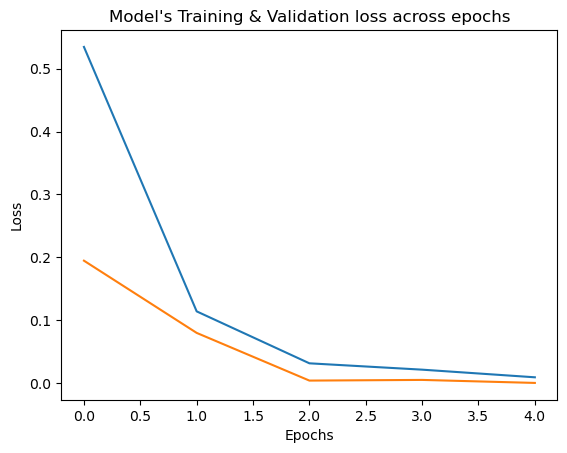

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')

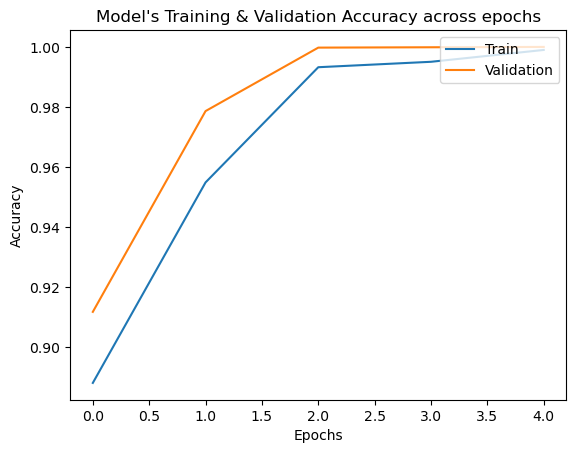

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# lets make some predicitons with the test set
prediction = model.predict(X_test)
binary_predictions = (prediction >= 0.5).astype(int)

   1/9681 [..............................] - ETA: 17:57

2023-10-06 16:12:03.629154: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 56997680 exceeds 10% of free system memory.


9681/9681 [==============================] - 74s 8ms/step


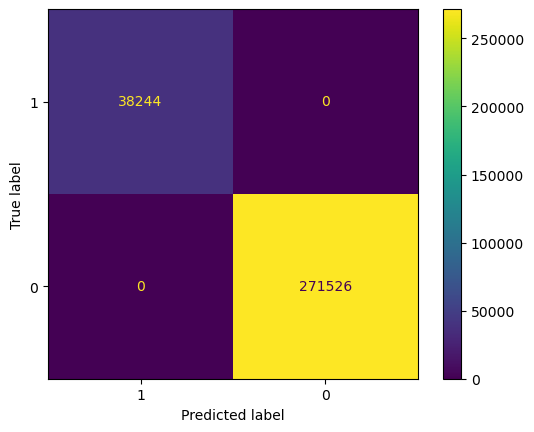

In [ ]:
cm = confusion_matrix(y_test, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '0'])
disp.plot()
plt.show()

In [ ]:
outcoome = pd.DataFrame(y_test.values, columns=['Actual Outcome'])
outcoome['Predicted Outcome'] = pd.DataFrame(binary_predictions)
outcoome.sample(10)

,Actual Outcome,Predicted Outcome
34809,1,1
143799,1,1
158567,1,1
99747,1,1
270503,0,0
174837,0,0
268497,1,1
207944,1,1
138613,1,1
109714,0,0


In [ ]:
plt.bar(merged_df['outcome'], height=0.5, width=1)

KeyboardInterrupt: 